In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator
#from scipy.stats import qmc
# from sklearn.preprocessing import MinMaxScaler

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
np.set_printoptions(threshold=1000000)
import keras as K
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Activation, BatchNormalization
from keras.layers import Dropout, UpSampling2D, ZeroPadding2D, AveragePooling2D, Conv2DTranspose
from keras.layers import Flatten, Cropping1D, Reshape
from keras.layers.convolutional import Conv2D, Conv1D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D,MaxPooling1D
from keras.engine.topology import Layer
from keras.layers import Lambda, Input,LSTM,Input, concatenate
import tensorflow as tf
from itertools import product
from keras.layers import Conv1DTranspose
from keras.layers import Conv3DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Conv1DTranspose, Add
import tensorflow.keras.backend as K
import seaborn as sns
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout, Add, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from keras.layers import LeakyReLU
import math

2024-04-20 15:55:49.541558: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-04-19 15:28:55.817047: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-04-19 15:28:55.818393: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-04-19 15:28:55.843230: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.683GHz coreCount: 15 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 238.66GiB/s
2024-04-19 15:28:55.843284: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-19 15:28:55.845870: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-19 15:28:55.845943: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.1

In [15]:
path=os.getcwd()
print(path)

/home/soumyashree/Praveen/Antenna dataset/Trials/Asymmtry/ant_128F_model


In [3]:
P1 = np.loadtxt('pattern_batch4K.txt')
S1=np.loadtxt('S11_batch4K.txt')
I1 = np.loadtxt('imp_batch4K.txt')
Z1= I1[:,0:128]
np.shape(Z1)

(4096, 128)

In [4]:
np.shape(P1)

(4096, 41600)

In [5]:
P2 = np.loadtxt('pattern_batch8K.txt')
S2=np.loadtxt('S11_batch8K.txt')
I2 = np.loadtxt('imp_batch8K.txt')
Z2= I2[:,0:128]
np.shape(Z2)

(4096, 128)

In [6]:
P3 = np.loadtxt('patt_batch12K.txt')
S3=np.loadtxt('S11_batch12K.txt')
I3 = np.loadtxt('imp_batch12K.txt')
Z3= I3[:,0:128]
np.shape(Z2)

(4096, 128)

In [7]:
P4 = np.loadtxt('patt_batch16K.txt')
S4=np.loadtxt('S11_batch16K.txt')
I4 = np.loadtxt('imp_batch16K.txt')
Z4= I4[:,0:128]
np.shape(Z2)

(4096, 128)

In [8]:
S11=np.concatenate((S1,S2,S3,S4),axis=0)
np.shape(S11)
Patt=np.concatenate((P1,P2,P3,P4),axis=0)
Zo=np.concatenate((Z1,Z2,Z3,Z4),axis=0)
# np.shape(Zo)

526


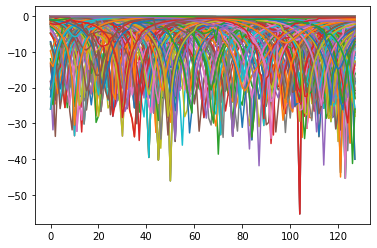

In [7]:
# S11=y2[:,41600:41728]
# # S11=10*np.log(S11)

datapoint = []
for i in range (S11.shape[0]):
    if np.any(S11[i,:]<-20):
        plt.plot(S11[i,:])
        datapoint.append(i)
        count = len(datapoint)
# plt.show()
print(count)

In [20]:
Zo.min()

-423.65202

In [9]:
s11= S11/10
s11=10**s11
np.max(s11)

2.602375729870356

In [10]:
patt=Patt/10
patt=10**patt
np.max(patt)

334.1681081732482

In [11]:
# yy=np.concatenate((patt,s11,Zo),axis=1)
# np.shape(yy)

In [12]:
yy=np.concatenate((patt,s11,Zo),axis=1)
np.shape(yy)

(16384, 41856)

In [15]:
 print(np.where(S11>0))
# S11= np.delete(S11,[1379,1957,2468,2689,5090,7361,8587,11847,12561,14063,15404,16273],axis=0)
# np.shape(S11)

(array([ 1379,  1379,  1379,  1379,  1379,  1379,  1379,  1379,  1379,
        1957,  1957,  1957,  1957,  1957,  1957,  1957,  1957,  1957,
        2468,  2468,  2468,  2468,  2468,  2468,  2468,  2468,  2468,
        2689,  2689,  2689,  2689,  2689,  2689,  2689,  2689,  2689,
        5090,  5090,  5090,  7361,  8587,  8587,  8587,  8587,  8587,
        8587,  8587,  8587,  8587, 11847, 11847, 11847, 11847, 11847,
       11847, 11847, 12561, 12561, 12561, 12561, 12561, 12561, 12561,
       14063, 14063, 14063, 14063, 15404, 15404, 15404, 16273, 16273,
       16273]), array([ 57,  61,  63,  65,  66,  67,  68,  69,  70,  57,  61,  63,  65,
        66,  67,  68,  69,  70,  57,  61,  63,  65,  66,  67,  68,  69,
        70,  57,  61,  63,  65,  66,  67,  68,  69,  70,   3,   4,   6,
         6, 119, 120, 121, 122, 123, 124, 125, 126, 127,  86, 102, 103,
       112, 115, 123, 124,  62,  65,  69,  70,  75,  77,  78,  57,  59,
        61,  62,  43,  44,  49,  43,  44,  49]))


In [10]:
# YY2= yy2/10
# YY2=10**YY2
# np.max(YY2)

0.991601100305221

In [992]:
# yy1= np.zeros(np.shape(YY1))
# yy1 = (YY1-np.min(YY1))/(np.max(YY1)-np.min(YY1))
# np.max(yy1)

1.0

In [6]:
# xx=np.loadtxt("str128_4K.txt")
# np.shape(xx)

(4096, 17)

In [7]:
# xx=np.delete(xx,[1379,1957,2468,2689],axis=0)
# np.shape(xx)

(4092, 17)

In [13]:
x1=np.loadtxt("X_batch4K.txt")
x1=x1[:,0:8]
np.shape(x1)
x2=np.loadtxt("X_batch8K.txt")
x2=x2[:,0:8]
np.shape(x2)
x3=np.loadtxt("X_batch12K.txt")
x3=x3[:,0:8]
x4=np.loadtxt("X_batch16K.txt")
x4=x4[:,0:8]
# x5=np.loadtxt("/home/soumyashree/Praveen/Antenna dataset/Trials/Asymmtry/Symmetrical antenna model/X_batch1K.txt")
# x5=x5[:,0:8]
# x6=np.loadtxt("/home/soumyashree/Praveen/Antenna dataset/Trials/Asymmtry/Symmetrical antenna model/X_batch2-3K.txt")
# x6=x6[:,0:8]
XX=np.concatenate((x1,x2,x3,x4),axis=0)
np.shape(XX)

(16384, 8)

In [14]:
y1=np.loadtxt("Y_batch4K.txt")
y1=y1[:,0:8]
y2=np.loadtxt("Y_batch8K.txt")
y2=y2[:,0:8]
np.shape(y1)
y3=np.loadtxt("Y_batch12K.txt")
y3=y3[:,0:8]
y4=np.loadtxt("Y_batch16K.txt")
y4=y4[:,0:8]
# y5=np.loadtxt("/home/soumyashree/Praveen/Antenna dataset/Trials/Asymmtry/Symmetrical antenna model/Y_batch1K.txt")
# y5=y5[:,0:8]
# y6=np.loadtxt("/home/soumyashree/Praveen/Antenna dataset/Trials/Asymmtry/Symmetrical antenna model/Y_batch2-3K.txt")
# y6=y6[:,0:8]
YY=np.concatenate((y1,y2,y3,y4),axis=0)
np.shape(YY)

(16384, 8)

In [15]:
xy=np.concatenate((XX,YY),axis=1)
np.shape(xy)

(16384, 16)

In [18]:
# xx2=np.delete(xy,[1379,1957,2468,2689,5090,7361],axis=0)
# np.shape(xx2)

In [17]:
# xx= np.zeros(np.shape(xy))
# xx = (xy-np.min(xy))/(np.max(xy)-np.min(xy))
# np.max(xx)

In [16]:
lower = np.array([-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,
                  -0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03])
                  

upper = np.array([0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,
                  0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03])
                  
for i in range (np.shape(xy)[0]):
    xy[i] = (xy[i]-lower)/(upper-lower)
np.max(xy)

0.9993333333333334

In [31]:
# pi = math.pi
# xx=np.loadtxt("str_32K.txt")
# lower = np.array([10,10,10,10,10,10,10,10,
#                   10,10,10,10,10,10,10,10,
#                   2*pi-5*pi/12]) #R1,R2,Phi1,Phi2,Alpha

# upper = np.array([40,40,40,40,40,40,40,40,
#                   100,100,100,100,100,100,100,100,
#                   2*pi-pi/12])
# for i in range (np.shape(xx)[0]):
#     xx[i] = (xx[i]-lower)/(upper-lower)
# # print(xx)
# np.shape(xx)

(32768, 17)

In [17]:
print(np.max(xy),np.min(xy),np.shape(xy))

0.9993333333333334 0.0 (16384, 16)


In [18]:
print(np.max(yy),np.min(yy),np.shape(yy))

1216.27377 -213.97706 (16384, 41856)


In [139]:
# yy3= np.zeros(np.shape(YY3))
# yy3 = (YY3-np.min(YY3))/(np.max(YY3)-np.min(YY3))
# np.max(yy3)

1.0

In [19]:
np.min(YY)
# yy.shape

-0.02988

In [24]:

# sns.scatterplot(data=S11)

# Custom Loss functions

In [999]:
class changeAlpha(keras.callbacks.Callback):
    def __init__(self, alpha):
        super(changeAlpha, self).__init__()
        self.alpha = alpha 

In [1238]:
def ant_loss(a,b,c,reg_fac,alpha):
    # function that accepts the ground truth and predictions
    def Ant_loss(y_true, y_pred):
        error1 = (y_true[:,0:5200] - y_pred[:,0:5200])
        error1 =  tf.square(error1) + reg_fac*tf.abs(error1)
        error2 = tf.square(y_true[:,5200:5216] - y_pred[:,5200:5216])
        error2 =  tf.square(error2) + reg_fac*tf.abs(error2)
        error2 = tf.exp(7*alpha)*error2
        error3 = tf.square(y_true[:,5216:5232] - y_pred[:,5216:5232])
        error3 =  tf.square(error3) + reg_fac*tf.abs(error3)
        error3 = tf.exp(.5*alpha)*error3

        loss1 = tf.reduce_mean(a*error1)
        loss2 = tf.reduce_mean(b*error2)
        loss3 = tf.reduce_mean(c*error3)
        total_loss = (loss1+loss2+loss3)/3
#         print(alpha)
        return total_loss
    # return the inner function tuned by the hyperparameter
    return Ant_loss

In [1001]:
def ant_loss2(a,b,c):
    # function that accepts the ground truth and predictions
    def Ant_loss2(y_true, y_pred):
        error1 = tf.square(y_true[:,0:5200] - y_pred[:,0:5200])
        error2 = tf.square(y_true[:,5200:5216] - y_pred[:,5200:5216])
        error3 = tf.square(y_true[:,5216:5232] - y_pred[:,5216:5232])
       

        loss1 = tf.reduce_mean(a*error1)
        loss2 = tf.reduce_mean(b*error2)
        loss3 = tf.reduce_mean(c*error3)
        total_loss = (loss1+loss2+loss3)/3
        print(alpha)
        return total_loss
    # return the inner function tuned by the hyperparameter
    return Ant_loss2

In [34]:
# Custom relative error
def rel_loss(y_true, y_pred):
#     error = tf.square((y_true - y_pred)/(y_pred))
    loss = tf.reduce_mean(tf.abs((y_true - y_pred)) / ((y_true)))
    return loss
   

In [21]:
def std_dev(actu, pred):
    return keras.backend.std(keras.backend.abs(actu - pred))

def mmae(actu, pred):
    return keras.backend.max(keras.backend.abs(actu - pred))

In [1155]:
def err_reg(reg_fac):
    # function that accepts the ground truth and predictions
    def S11_Reg(y_true, y_pred):
        error = y_true - y_pred
        return tf.square(error) + reg_fac*tf.abs(error)
    # return the inner function tuned by the hyperparameter
    return S11_Reg

# Train-Test split

In [40]:
x_tr,x_te,y_tr,y_te= train_test_split(xy, yy, test_size= 0.3)
print(np.shape(x_tr), np.shape(x_te), np.shape(y_tr), np.shape(y_te))

(11468, 16) (4916, 16) (11468, 41856) (4916, 41856)


# Combined learning model 1

In [709]:
initializer = tf.keras.initializers.GlorotNormal()
# with tf.device('/device:GPU:1'):
input_shape = (16,)

input_layer = Input(shape=input_shape)

dens1 = Dense(64,kernel_initializer=initializer,activation='relu')(input_layer)
#     dens1 = LeakyReLU(alpha=0.1)(dens1)
dens2 = Dense(128,kernel_initializer=initializer,activation='relu')(dens1)
#     dens2 = LeakyReLU(alpha=0.1)(dens2)
dens3 = Dense(256,kernel_initializer=initializer,activation='relu')(dens2)
#     dens3 = LeakyReLU(alpha=0.1)(dens3)
dens4 = Dense(512,kernel_initializer=initializer,activation='relu')(dens3) 
#     dens4 = LeakyReLU(alpha=0.1)(dens4)
d1 = Dropout(0.5)(dens4)
   
     # S11 training
dens9 = Dense(256,kernel_initializer=initializer,activation='relu')(d1)
dens10 = Dense(128,kernel_initializer=initializer,activation='relu')(dens9)
#     dens11 = Dense(128,kernel_initializer=initializer,activation='relu')(dens10)
#     dens12 = Dense(32,kernel_initializer=initializer,activation='relu')(dens11)
S11 = Dense(128,kernel_initializer=initializer,activation='relu')(dens10)


# Zo training
dens13 = Dense(256,kernel_initializer=initializer,activation='relu')(d1)
dens14 = Dense(128,kernel_initializer=initializer,activation='relu')(dens13)
#     dens15 = Dense(64,kernel_initializer=initializer,activation='relu')(dens14)
#     dens16 = Dense(32,kernel_initializer=initializer,activation='relu')(dens15)
Zo = Dense(128,kernel_initializer=initializer,activation='relu')(dens14)
    
# merging
x_1 = concatenate([S11, Zo])
dens17 = Dense(1024,kernel_initializer=initializer,activation='relu')(x_1)

     
    # pattern training   
# densf = Dense(3200,activation='relu')(d1)
# reshaped = Reshape((128, 25, 1))(densf)
    
    
# conv2d_transpose = Conv2DTranspose(128, (1, 1), activation='relu',kernel_initializer=initializer)(reshaped)
# conv2d_transpose1 = Conv2DTranspose(64, (1, 1), activation='relu',kernel_initializer=initializer)(conv2d_transpose)
# conv2d_transpose2 = Conv2DTranspose(128, (1, 1), activation='relu',kernel_initializer=initializer)(conv2d_transpose1)
# conv2d_transpose3 = Conv2DTranspose(13, (1, 1), activation='relu',kernel_initializer=initializer)(conv2d_transpose2)
# Pattern_output = Reshape((41600,))(conv2d_transpose3)

# x_2 = concatenate([Pattern_output, dens17])
dens14 = Dense(2048,activation='relu',kernel_initializer=initializer)(dens17)
dens15 = Dense(4096,activation='relu',kernel_initializer=initializer)(dens14)
densf = Dense(41856, activation='linear')(dens15)

         
model = Model(inputs=input_layer, outputs=densf)
    # Compile the combined model
#     alpha = K.variable(1.)
model.compile(optimizer='adam',
                           loss=['mse'],
                           metrics=['mse'])

    # Print the model summary
model.summary()
     

Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 16)]         0                                            
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 64)           1088        input_23[0][0]                   
__________________________________________________________________________________________________
dense_34 (Dense)                (None, 128)          8320        dense_33[0][0]                   
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 256)          33024       dense_34[0][0]                   
___________________________________________________________________________________________

# Combined learning model 2

In [32]:
initializer = tf.keras.initializers.GlorotNormal()
from tensorflow.keras.regularizers import l1, l2,L1L2
# l1_regularization = 0.3
# l2_regularization = 0.1 ,,kernel_regularizer=l1_l2(lamda)
lamda =0
L2 = 0
# activity_regularizer=l2(l2_regularization)
with tf.device('/device:GPU:2'):
    
         
    iput = Input(shape=(16,1))

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(iput)
    #    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv1)
    conv2 = BatchNormalization()(conv2)
    #     conv2 = MaxPooling1D(pool_size=2)(conv2)
    conv3 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv2)
    conv3 = BatchNormalization()(conv3)
    #     conv3 = MaxPooling1D(pool_size=2)(conv3)
    conv4 = Conv1D(filters=512, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv3)
    conv4 = BatchNormalization()(conv4)
    #     conv4 = Dropout(0.3)(conv4)
    #     conv4 = MaxPooling1D(pool_size=2)(conv4)
    conv5 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv4)
    conv5 = BatchNormalization()(conv5)
    #     conv5 = Dropout(0.3)(conv5)
    #     conv5 = MaxPooling1D(pool_size=2)(conv5)
    conv6 = Conv1D(filters=512, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv5)
    conv6 = BatchNormalization()(conv6)
    #     conv6 = MaxPooling1D(pool_size=2)(conv6)
    conv7 = Conv1D(filters=512, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv6)
    conv7 = BatchNormalization()(conv7)
    #     conv7= MaxPooling1D(pool_size=2)(conv7)
    conv8 = Conv1D(filters=1024, kernel_size=2, activation='relu',kernel_regularizer=L1L2(lamda))(conv7)
    conv8 = BatchNormalization()(conv8)
#     conv8 = Dropout(0.5)(conv8)
#     conv8= MaxPooling1D(pool_size=2)(conv8)
    conv9 = Conv1D(filters=1024, kernel_size=1, activation='relu',kernel_regularizer=L1L2(lamda))(conv8)
    conv9 = BatchNormalization()(conv9)
#     conv9 = Dropout(0.5)(conv9)
    
    F = Flatten()(conv8)

#     dens1 = Dense(20928, activation='relu',kernel_initializer=initializer,kernel_regularizer=L1L2(lamda))(F)
    #     dens1= BatchNormalization()(dens1)
    densf = Dense(41856, activation='linear')(F)
    oput=densf


    model3 = Model(inputs=iput, outputs = oput)


    model3.summary()
    #     opt = SGD(learning_rate=0.001, momentum=0.99)
    model3.compile(optimizer = 'adam',
                    loss=['mse'],
                    metrics=['mse'])
        

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16, 1)]           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 14, 64)            256       
_________________________________________________________________
batch_normalization_9 (Batch (None, 14, 64)            256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 12, 128)           24704     
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 128)           512       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 10, 256)           98560     
_________________________________________________________________
batch_normalization_11 (Batc (None, 10, 256)           1024

In [34]:
es = EarlyStopping(monitor='val_mse', mode='min', patience=50)
#instance = changeAlpha()
with tf.device('/device:GPU:2'):
    hstry3 = model3.fit(x_tr,y_tr, epochs = 10000,
                    batch_size=512, shuffle=True,
                validation_data=(x_te,y_te), callbacks=[es])

2023-10-26 17:04:30.487582: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-10-26 17:04:30.492229: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2998430000 Hz


Epoch 1/10000


2023-10-26 17:04:32.200288: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-10-26 17:04:32.584880: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-10-26 17:04:33.922086: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-10-26 17:04:34.085365: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


31/31 [==============================] - 93s 2s/step - loss: 0.5590 - mse: 0.5590 - val_loss: 0.5661 - val_mse: 0.5661
Epoch 2/10000
31/31 [==============================] - 3s 95ms/step - loss: 0.3826 - mse: 0.3826 - val_loss: 0.5533 - val_mse: 0.5533
Epoch 3/10000
31/31 [==============================] - 3s 95ms/step - loss: 0.2468 - mse: 0.2468 - val_loss: 0.4802 - val_mse: 0.4802
Epoch 4/10000
31/31 [==============================] - 3s 95ms/step - loss: 0.2232 - mse: 0.2232 - val_loss: 0.4747 - val_mse: 0.4747
Epoch 5/10000
31/31 [==============================] - 3s 93ms/step - loss: 0.2109 - mse: 0.2109 - val_loss: 0.4582 - val_mse: 0.4582
Epoch 6/10000
31/31 [==============================] - 3s 93ms/step - loss: 0.1868 - mse: 0.1868 - val_loss: 0.5281 - val_mse: 0.5281
Epoch 7/10000
31/31 [==============================] - 3s 96ms/step - loss: 0.1686 - mse: 0.1686 - val_loss: 0.4069 - val_mse: 0.4069
Epoch 8/10000
31/31 [==============================] - 3s 97ms/step - loss: 0

Epoch 62/10000
31/31 [==============================] - 3s 95ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.1543 - val_mse: 0.1543
Epoch 63/10000
31/31 [==============================] - 3s 97ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.1483 - val_mse: 0.1483
Epoch 64/10000
31/31 [==============================] - 3s 95ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 10.3765 - val_mse: 10.3765
Epoch 65/10000
31/31 [==============================] - 3s 95ms/step - loss: 0.1635 - mse: 0.1635 - val_loss: 1.9325 - val_mse: 1.9325
Epoch 66/10000
31/31 [==============================] - 3s 96ms/step - loss: 0.1211 - mse: 0.1211 - val_loss: 0.5965 - val_mse: 0.5965
Epoch 67/10000
31/31 [==============================] - 3s 95ms/step - loss: 0.0765 - mse: 0.0765 - val_loss: 0.4404 - val_mse: 0.4404
Epoch 68/10000
31/31 [==============================] - 3s 95ms/step - loss: 0.0500 - mse: 0.0500 - val_loss: 0.3086 - val_mse: 0.3086
Epoch 69/10000
31/31 [==============================]

In [41]:
with tf.device('/device:GPU:2'):
    y_pred = modelb.predict(x_te)
    err = np.mean((y_te - y_pred)**2)
    print(err)

2024-04-20 16:10:58.857704: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 823056384 exceeds 10% of free system memory.


0.06619171302311112


In [22]:
modelb=load_model('model_3combined.h5')

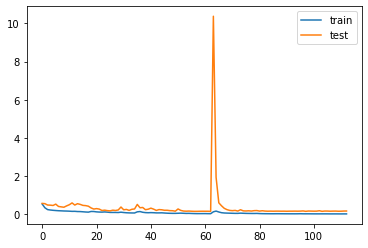

In [36]:
plt.plot(hstry3.history['mse'],label='train')
plt.plot(hstry3.history['val_mse'],label='test')
plt.legend()
plt.show()

In [1211]:
# y2= np.zeros(np.shape(YY2))
# y2 = (YY2-np.min(YY2))/(np.max(YY2)-np.min(YY2))
# np.min(y2)

Mean Squared Error (MSE): 0.08605179519085705
Mean Absolute Error (MAE): 0.047028794681752945
R2_score: 0.6037175356088949
Adjusted_R2_score: 1.0527253813508644


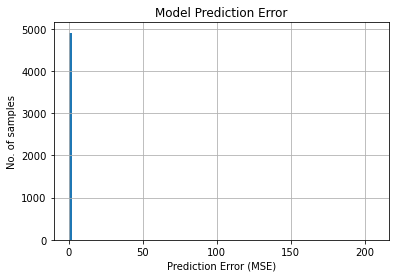

4594 out of 4916
MSE_error< 0.05 = 93.44995931651749 %


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# y_pred = model3.predict(x_te)
# err = np.mean((y_te - y_pred)**2)
# print('model_error=',err)
    
mse = mean_squared_error(y_te, y_pred)
mae = mean_absolute_error(y_te, y_pred)
r2 = r2_score(y_te, y_pred)
adj_r2 = (1 - (1 - r2) * ((y_te.shape[0] - 1) / 
          (y_te.shape[0] - y_te.shape[1] - 1)))
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2_score:", r2)
print("Adjusted_R2_score:", adj_r2)

prediction_error = np.mean(np.square(y_te - y_pred), axis=1)
# Plot histogram of prediction error
num_bins = 100
plt.hist(prediction_error,num_bins,histtype='stepfilled')
plt.xlabel('Prediction Error (MSE)')
plt.ylabel('No. of samples')
plt.title('Model Prediction Error')
plt.grid(True)
plt.show()
pred=np.size(np.where(prediction_error<0.05))
sample=y_te.shape[0]                     
print(pred, 'out of',y_te.shape[0])
print('MSE_error< 0.05 =',pred*100/sample,'%')

In [173]:
# with tf.device('/device:GPU:0'):
# model3.save("model_3combined.h5")
# print("Saved model to disk")

Saved model to disk


In [652]:
# X3=np.loadtxt('testing data/X_128f_batch12K_1.txt')
# X3 = X3[:,0:8]
# Y3=np.loadtxt('testing data/Y_128f_batch12K_1.txt')
# Y3 = Y3[:,0:8]
# XX=np.concatenate((X3,Y3),axis=1)
# np.shape(XX)

(2048, 16)

In [653]:
# S11=np.loadtxt('testing data/ant128_S11_batch12K_1.txt',delimiter=',')
# patt = np.loadtxt('testing data/ant128_patt_batch12K_1.txt',delimiter=',')
# imp = np.loadtxt('testing data/ant128_imp_batch12K_1.txt',delimiter=',')
# zo = imp[:,0:128]
# np.shape(zo)

(2048, 128)

In [654]:
# s3= S11/10
# s3=10**s3
# p3= patt/10
# p3=10**p3
# print(np.max(p3),np.max(s3))

30.618419555652498 2.6023762326196933


In [655]:
# yy3=np.concatenate((p3,s3,zo),axis=1)
# np.shape(y3)

(2048, 41856)

In [656]:
#  xx1= np.zeros(np.shape(XX))
# xx1 = (XX-np.min(XX))/(np.max(XX)-np.min(XX))
# np.min(xx1)

0.0

In [657]:
# model3.load_weights("model_combined2.h5")
# y2_pre = model3.predict(xx1)
# err = np.mean((yy3 - y2_pre)**2)
# print('error=',err)

error= 0.1707986551011584


In [122]:
y1_te=y_te[:,0:41600]
y1_pred=y_pred[:,0:41600]
np.shape(y1_pred)

(4916, 41600)

In [313]:
y2_te=y_te[:,41600:41728]
y2_pred=y_pred[:,41600:41728]
np.shape(y2_pred)

(4916, 128)

In [314]:
y2_te= 10*np.log(y2_te)
y2_pred= 10*np.log(y2_pred)

/tmp/ipykernel_1363217/2871525376.py:2: RuntimeWarning: invalid value encountered in log
  y2_pred= 10*np.log(y2_pred)


In [125]:
y3_te=y_te[:,41728:41856]
y3_pred=y_pred[:,41728:41856]
np.shape(y3_pred)

(4916, 128)

In [126]:
y1_te=np.reshape(y1_te,(4916,13,25,128))
y1_pre =np.reshape(y1_pred,(4916,13,25,128))
np.shape(y1_pre)

(4916, 13, 25, 128)

In [127]:
y1_te=np.swapaxes(y1_te,1,3)
y1_pre=np.swapaxes(y1_pre,1,3)
np.shape(y1_pre)

(4916, 128, 25, 13)

In [156]:
# y1_te= 10*np.log(y1_te)
# y1_pre= 10*np.log(y1_pre)

In [307]:
# np.savetxt('y2_1250.txt',y2_pred[1250])

In [310]:
# y2_pred=np.loadtxt('y2_1250.txt')

1189


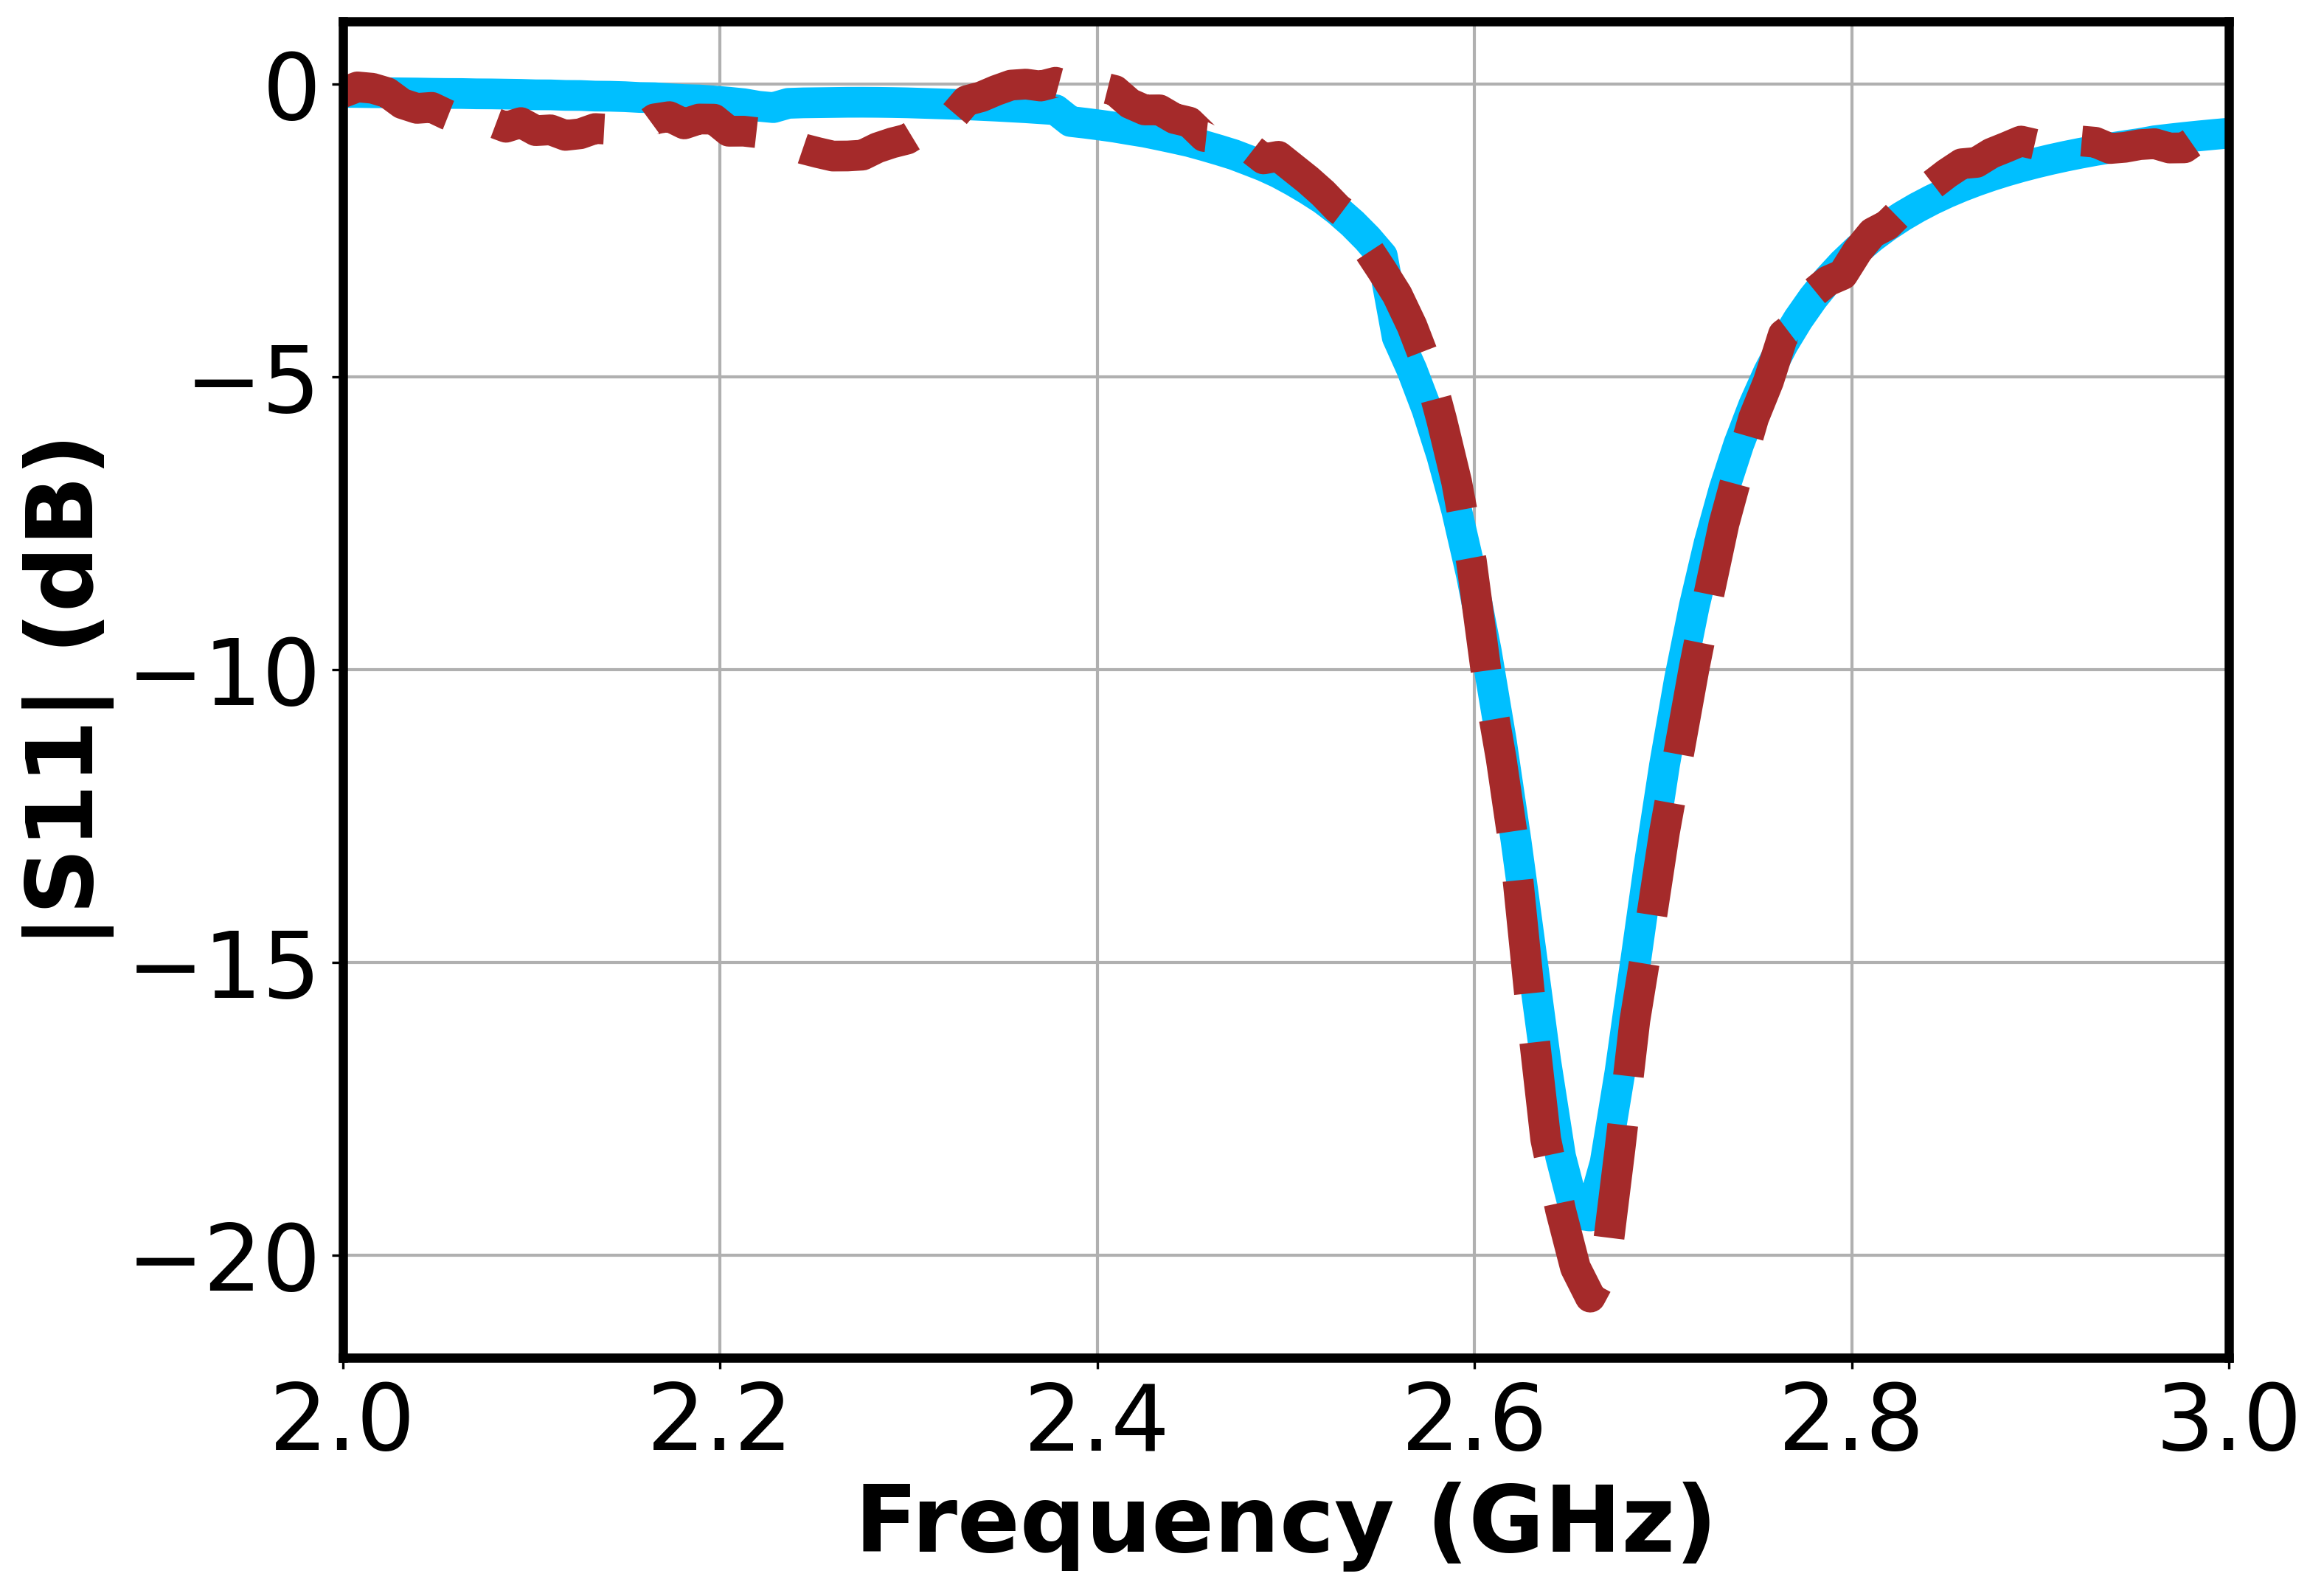

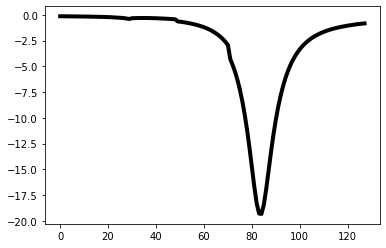

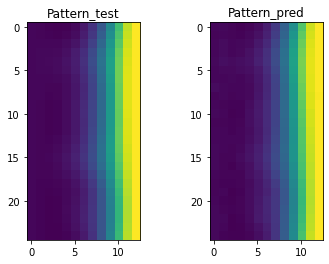

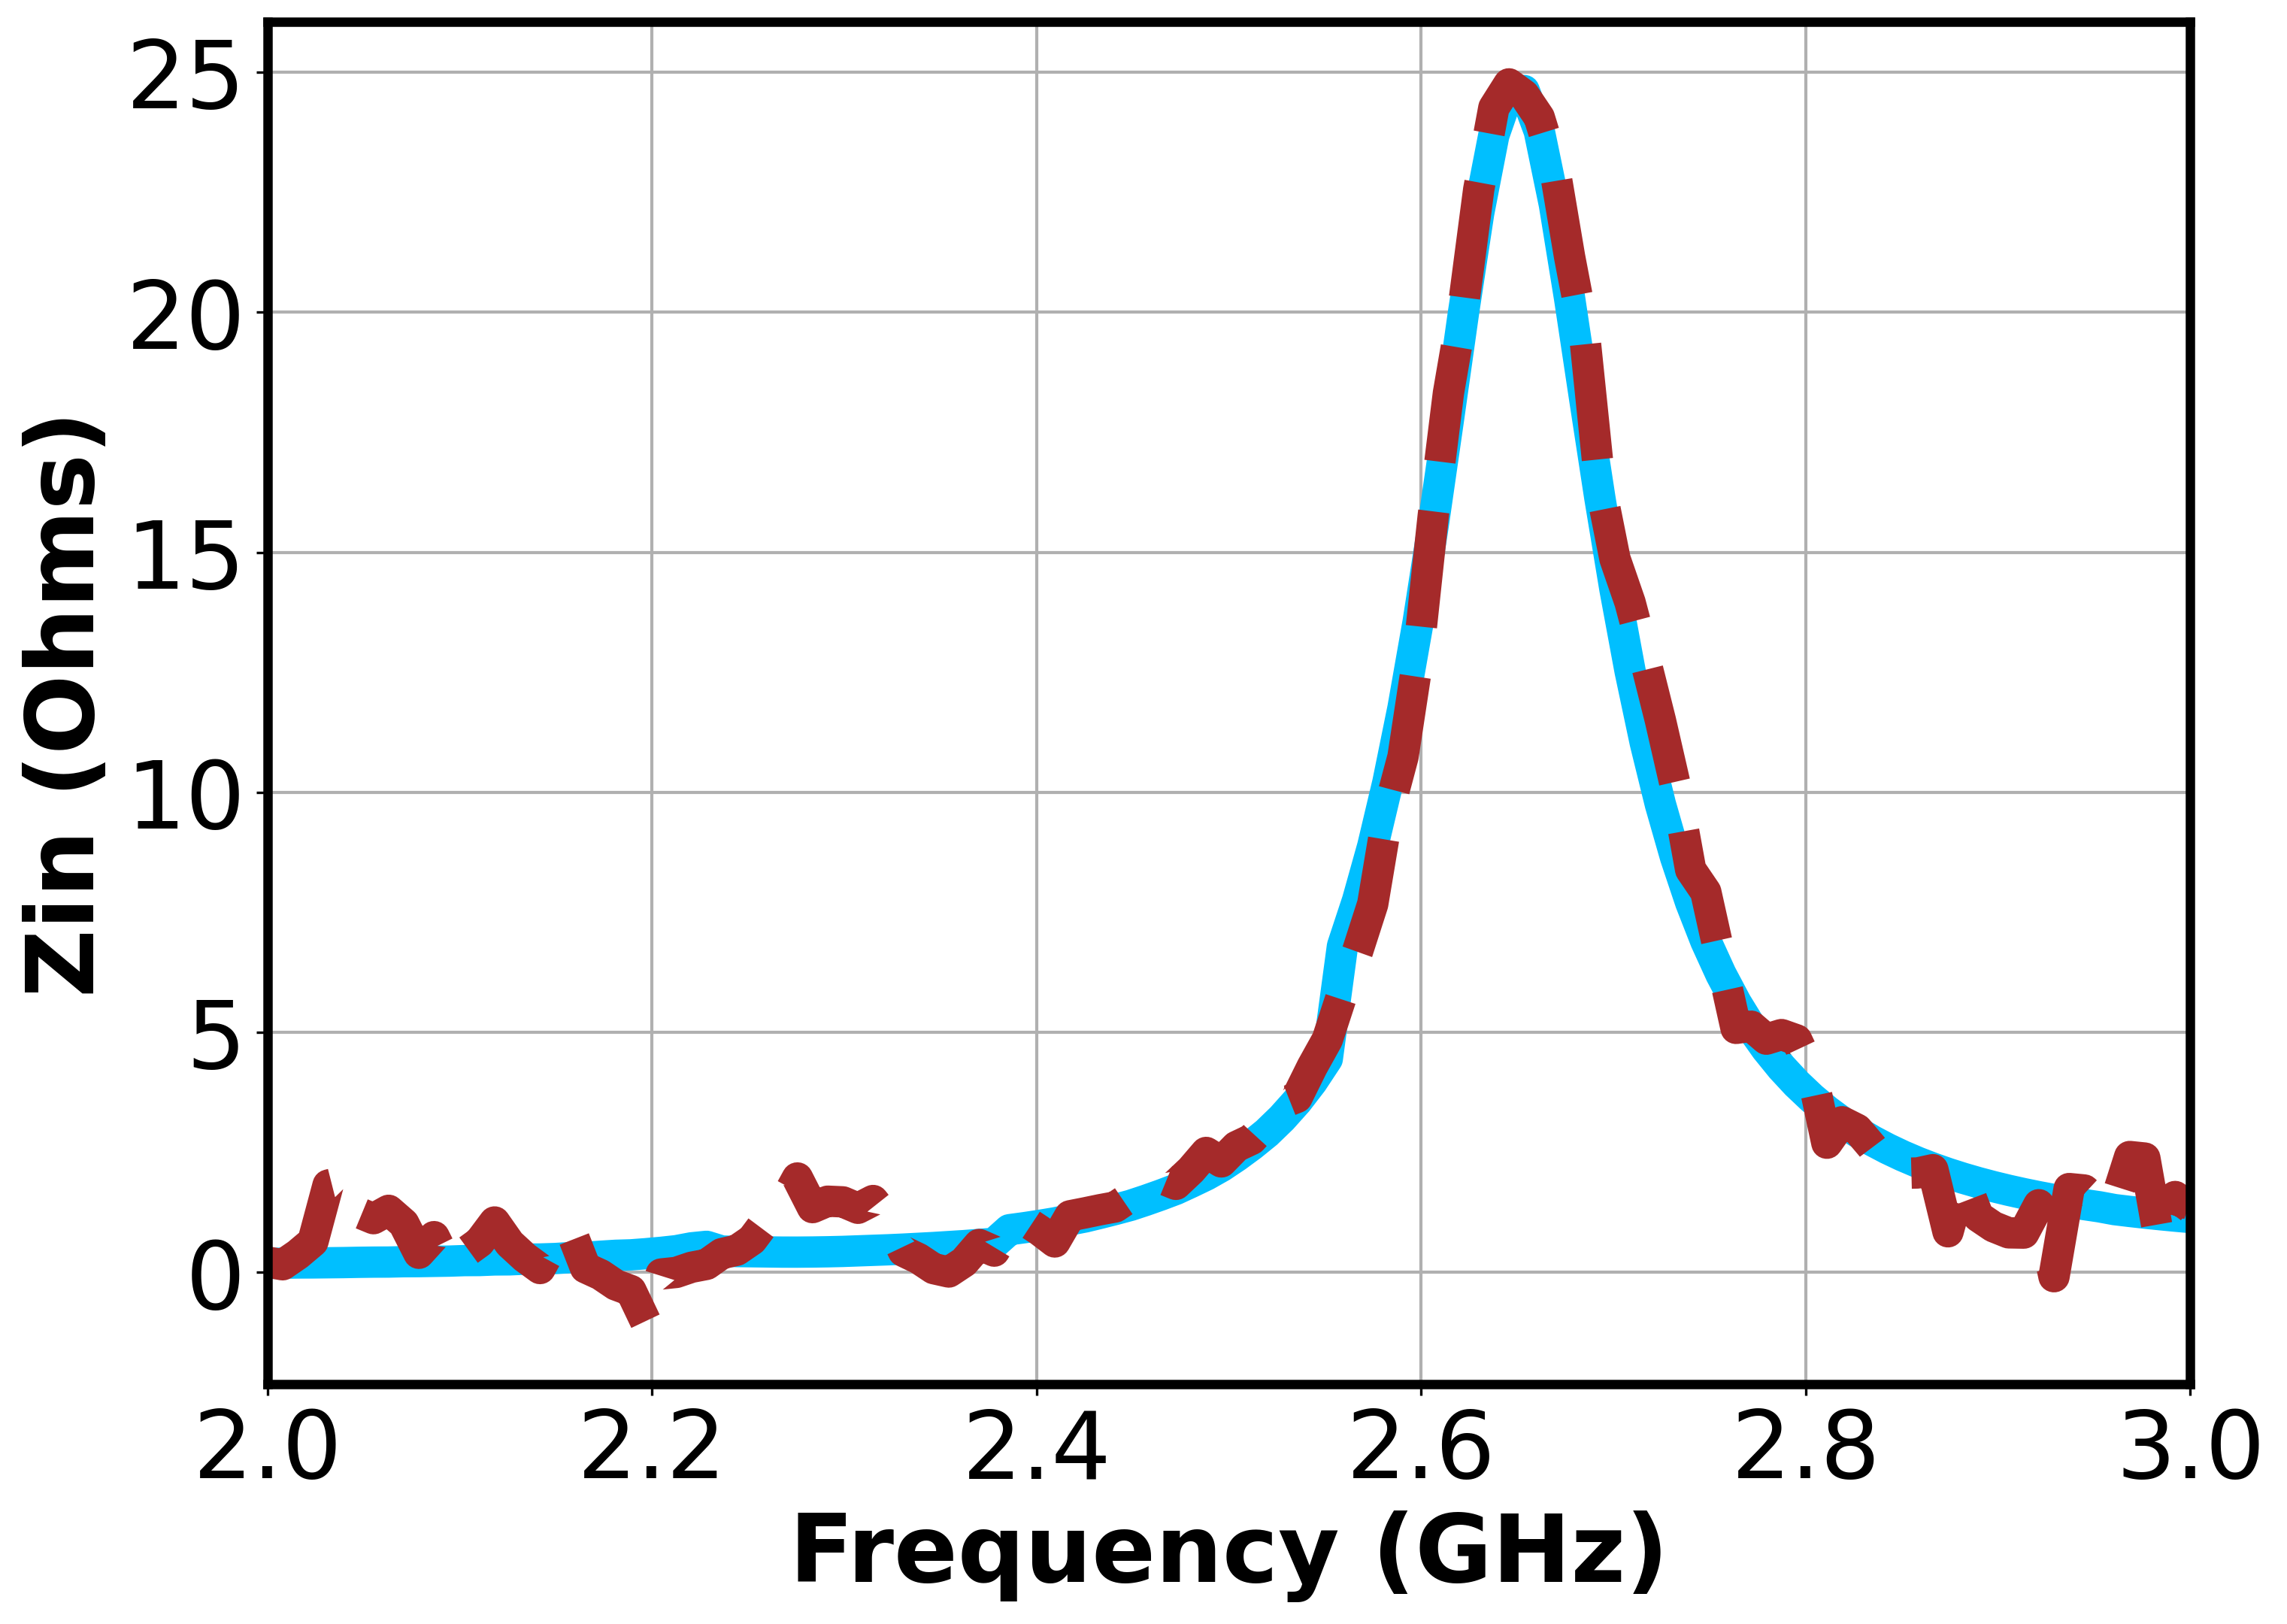

In [336]:
rr = np.random.randint(0,1639)
print(rr)
# err1 = np.mean((y_te[rr] - y_pred[rr])**2)
# # print('MSE_error=',err1)
# err2 = np.mean(np.absolute(y_te[rr] - y_pred[rr]))
# # print('MAE_error=',err2)
rr=679
freq = np.linspace(2,3,128)
# #S11 plot
plt.figure(figsize = (11, 8), dpi=300)
plt.plot(freq,(y2_te[rr]),label='Ground_truth',linewidth=10,color = 'deepskyblue')
plt.plot(freq,(y2_pred[rr]),label='Model_Predicted',linewidth=10,color = 'brown', ls='--')
# plt.title('S11 predictions', fontsize=30)
plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')
ax = plt.gca()
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.yaxis.set_major_locator(MultipleLocator(5))
plt.grid(True, which='both', linewidth=1)
plt.xlabel('Frequency (GHz)',fontsize=30,fontweight='bold', color='black')
plt.ylabel('|S11| (dB)',fontsize=30,fontweight='bold', color='black')

plt.xlim(2,3)
# plt.ylim(-30,0)
plt.show()

plt.plot(y2_te[rr],linewidth=4,color = 'black')
plt.show()
ff=82
pattern1=y1_te[rr,ff,:,:]
pattern2=y1_pre[rr,ff,:,:]
# pattern heatmap
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(pattern1)
ax1.set_title('Pattern_test')
ax2.imshow(pattern2)
ax2.set_title('Pattern_pred')
plt.show()
#Imp 1D plot
plt.figure(figsize = (11, 8), dpi=300)
plt.plot(freq,(y3_te[rr]),label='Ground_truth',linewidth=10,color = 'deepskyblue')
plt.plot(freq,(y3_pred[rr]),label='Model_Predicted',linewidth=10,color = 'brown', ls='--')
# plt.title('Zo predictions',fontsize=30)
plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')
ax = plt.gca()
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.yaxis.set_major_locator(MultipleLocator(5))
plt.xlabel('Frequency (GHz)',fontsize=30,fontweight='bold', color='black')
plt.ylabel('Zin (Ohms)',fontsize=30,fontweight='bold', color='black')
plt.grid(True, which='both', linewidth=1)
# plt.legend(fontsize=10)
plt.xlim(2,3)
# plt.ylim(0,30)
plt.show()

In [337]:
pattern1= 10*np.log(pattern1)
pattern2= 10*np.log(pattern2)

/tmp/ipykernel_1363217/2393774323.py:2: RuntimeWarning: invalid value encountered in log
  pattern2= 10*np.log(pattern2)


In [338]:
aa = pattern1[12]
xx = pattern2[12]
yz = np.flip(xx)
zz = np.append(xx,yz)
bb = np.flip(aa)
cc = np.append(aa,bb)
print(pattern1.shape,pattern2.shape)

(25, 13) (25, 13)


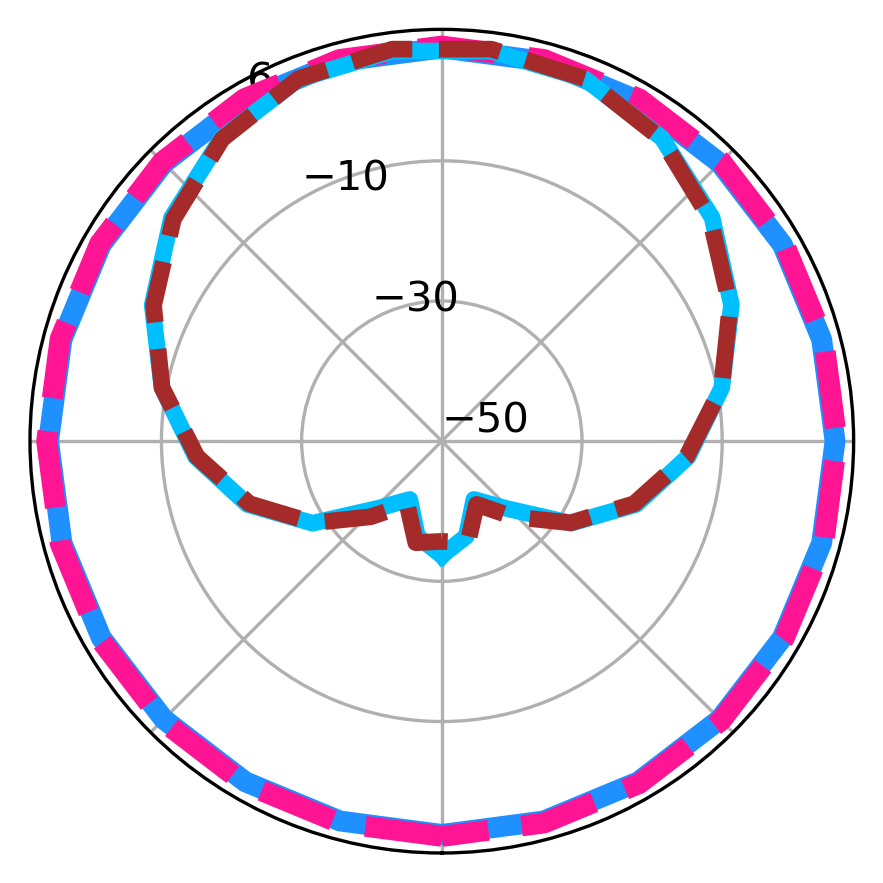

In [339]:
phi1 = np.linspace(0, 2*np.pi, 25)
phi2 = np.linspace(0, 2*np.pi,26)
plt.figure(figsize = (11, 8),dpi=300)
# ax = fig.add_subplot(111, projection='polar')
# # ax.plot(theta, P1, color='r', linewidth=3)
# 
# ax.set_theta_zero_location('N')
sp1 = plt.subplot(2, 1, 1, projection='polar')
sp1.set_theta_zero_location('S')
sp1.set_theta_direction(-1)
sp1.set_xticklabels([])
plt.polar(phi1, pattern1[:,12],label='EM simulated',linewidth=5,color = 'dodgerblue' )
plt.polar(phi1, pattern2[:,12],label='Model predicted',linewidth=5,color = 'deeppink',ls='--')
plt.polar(phi2, cc,linewidth=4,label='EM simulated',color = 'deepskyblue')
plt.polar(phi2,  zz,label='Model predicted',linewidth=4,color = 'brown',ls='--')
ax = plt.gca()
ax.set_rticks([-50, -30, -10, 6],fontsize = 30)
# ax.set_yticklabels([])
ax.set_rlabel_position(150)
plt.show()

In [143]:
np.savetxt('Pat_tgt2.4.txt',aaa,fmt='%5.5f', delimiter = '\t')

In [70]:
# # np.shape(x_te[721])
# act=x_te[778]
# x= np.append(act[0:8],act[0])
# y = np.append(act[8:16],act[8])
# print(x,y)
# plt.plot(x,y)

In [59]:
np.shape(pattern1[13,:])

aa = pattern1[13]
# xx = pattern2[13]
# yy = np.flip(xx)
# zz = np.append(xx,yy)
bb = np.flip(aa)
cc = np.append(aa,bb)
# print(aa, '\n', bb, '\n', cc,'\n', xx, '\n', yy, '\n', zz )

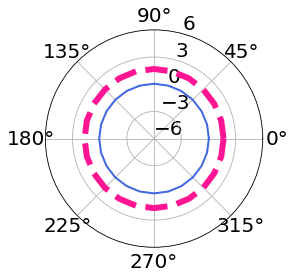

NameError: name 'zz' is not defined

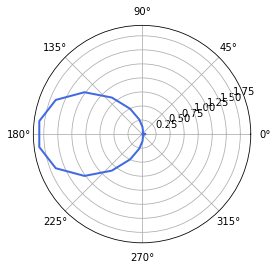

In [64]:
phi = np.linspace(0, 2*np.pi, 25)
# plt.figure(figsize = (11, 8),dpi=300)
plt.polar(phi, pattern1[:,0],label='Actual',linewidth=2,color = 'royalblue' )
plt.polar(phi, pattern2[:,12],label='Predicted',linewidth=6,color = 'deeppink', ls = '--')
ax = plt.gca()
ax.set_rticks([-6,-3, 0, 3, 6],fontsize=10)
ax.set_rlabel_position(75)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=23)
# plt.title('Pattern(H-plane)',fontsize=15)
plt.show()
# pat2=np.transpose(pat_mat)
phi = np.linspace(0, 2*np.pi,26)
# plt.figure(figsize = (11, 8),dpi=300)
plt.polar(phi, cc,linewidth=2,label='Actual',color = 'royalblue')
plt.polar(phi,  zz,label='Predicted',linewidth=2,color = 'deeppink',ls = '--')
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5],fontsize=10)
ax.set_rlabel_position(120)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=23)
# plt.title('Pattern(E-plane)',fontsize=15)
plt.show()

6


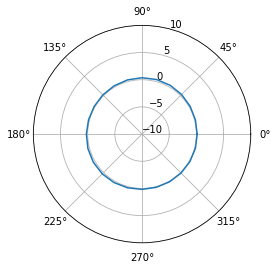

NameError: name 'pattern2' is not defined

In [59]:
rr = np.random.randint(0,13)
print(rr)
phi = np.linspace(0, 2*np.pi, 25)
plt.polar(phi, pattern1[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()

phi = np.linspace(0, 2*np.pi, 25)
plt.polar(phi, pattern2[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()


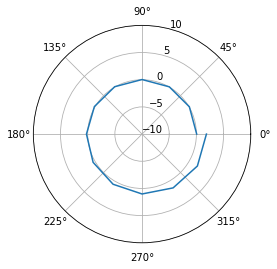

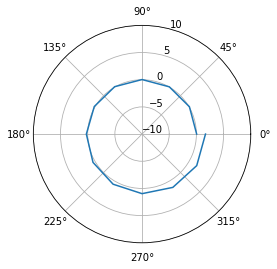

In [62]:
pat1=np.transpose(pattern1)
pat2=np.transpose(pattern2)
phi = np.linspace(0, 2*np.pi,13)
plt.polar(phi, pat1[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()


phi = np.linspace(0, 2*np.pi,13)
plt.polar(phi, pat2[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()

# pattern plot in 1D

1


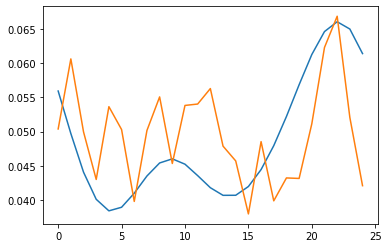

In [61]:
rr = np.random.randint(0,13)
print(rr)
plt.plot(pattern1[:,rr])
plt.plot(pattern2[:,rr])
# plt.title('Zo_test and Zo_pred')
# plt.ylim(1,0)
plt.show()